In [29]:
import numpy as np

In [30]:
import pandas as pd

In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [35]:
import os
import math

In [36]:
import scipy.io as sio

In [37]:
import scipy.stats

In [38]:
from collections import defaultdict, Counter

In [39]:
from scipy import stats

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

In [43]:
from tensorflow import keras

In [44]:
# Load the dataset
df = pd.read_csv('euler_data_left_wrist.csv')
df = df.drop([0])

In [45]:
print(df)

     PacketCounter  SampleTimeFine    Euler_X    Euler_Y     Euler_Z  \
1                1        79897288 -44.006100  39.279148 -159.631714   
2                2        79913955 -42.771473  40.480717 -158.369705   
3                3        79930622 -42.201080  41.910305 -157.384995   
4                4        79947289 -42.532143  43.498165 -156.531906   
5                5        79963956 -43.704803  45.181152 -155.828735   
6                6        79980623 -45.432957  47.099209 -155.189453   
7                7        79997290 -47.534390  49.309769 -154.510773   
8                8        80013957 -49.956146  51.621769 -153.760910   
9                9        80030624 -52.525787  53.896698 -152.910095   
10              10        80047291 -54.792458  56.118759 -151.692200   
11              11        80063958 -56.522751  58.324749 -149.956451   
12              12        80080625 -57.637878  60.602089 -147.705597   
13              13        80097292 -58.217342  62.957767 -145.08

In [47]:
df2 = pd.read_csv('Euler_data_left_wrist_label.csv')
df2 = df2.drop([0])

In [48]:
print(df2)

     PacketCounter  SampleTimeFine  Label  Unnamed: 3  Unnamed: 4 Unnamed: 5
1                1        79897288      1         NaN         NaN           
2                2        79913955      1         NaN         NaN           
3                3        79930622      1         NaN         NaN           
4                4        79947289      1         NaN         NaN           
5                5        79963956      1         NaN         NaN           
6                6        79980623      1         NaN         NaN           
7                7        79997290      1         NaN         NaN           
8                8        80013957      1         NaN         NaN           
9                9        80030624      1         NaN         NaN           
10              10        80047291      1         NaN         NaN           
11              11        80063958      1         NaN         NaN           
12              12        80080625      1         NaN         NaN           

In [49]:
df_train = df
label_train = df2

In [50]:
print("Shape of original data:", df_train.shape)
print("Shape of labels data:", label_train.shape)

Shape of original data: (404, 6)
Shape of labels data: (404, 6)


In [51]:
print(df_train.head())

   PacketCounter  SampleTimeFine    Euler_X    Euler_Y     Euler_Z Unnamed: 11
1              1        79897288 -44.006100  39.279148 -159.631714            
2              2        79913955 -42.771473  40.480717 -158.369705            
3              3        79930622 -42.201080  41.910305 -157.384995            
4              4        79947289 -42.532143  43.498165 -156.531906            
5              5        79963956 -43.704803  45.181152 -155.828735            


In [52]:
def magnitude(activity):
    x2 = activity['Euler_X'] * activity['Euler_X']
    y2 = activity['Euler_Y'] * activity['Euler_Y']
    z2 = activity['Euler_Z'] * activity['Euler_Z']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m

df_train['m'] = magnitude(df_train)
df_train.head()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Unnamed: 11,m
1,1,79897288,-44.006100,39.279148,-159.631714,,170.181293
2,2,79913955,-42.771473,40.480717,-158.369705,,168.964644
3,3,79930622,-42.201080,41.910305,-157.384995,,168.248154
4,4,79947289,-42.532143,43.498165,-156.531906,,167.938415
5,5,79963956,-43.704803,45.181152,-155.828735,,168.029882


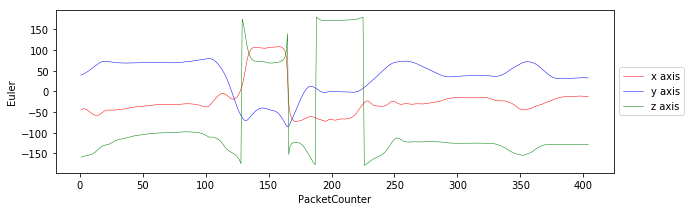

In [57]:
plt.figure(figsize=(10,3))
plt.plot(df_train['PacketCounter'], df_train['Euler_X'], linewidth=0.5, color='r', label='x axis')
plt.plot(df_train['PacketCounter'], df_train['Euler_Y'], linewidth=0.5, color='b', label='y axis')
plt.plot(df_train['PacketCounter'], df_train['Euler_Z'], linewidth=0.5, color='g', label='z axis')
plt.xlabel('PacketCounter')
plt.ylabel('Euler')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

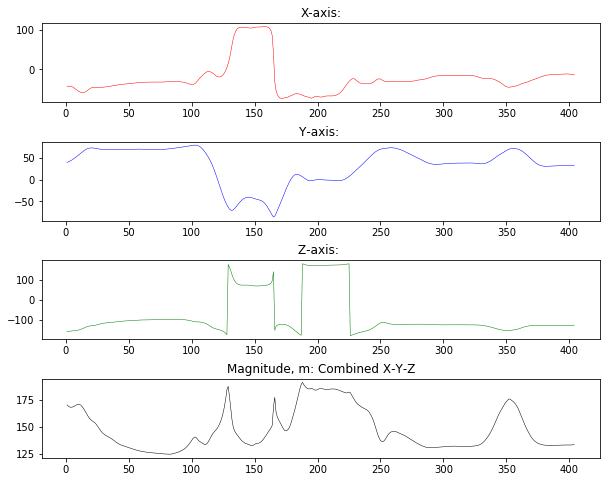

In [58]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))

ax[0].set_title('X-axis:')
ax[0].plot(df_train['PacketCounter'], df_train['Euler_X'], linewidth=0.5, color='r')

ax[1].set_title('Y-axis: ')
ax[1].plot(df_train['PacketCounter'], df_train['Euler_Y'], linewidth=0.5, color='b')

ax[2].set_title('Z-axis: ')
ax[2].plot(df_train['PacketCounter'], df_train['Euler_Z'], linewidth=0.5, color='g')

ax[3].set_title('Magnitude, m: Combined X-Y-Z')
ax[3].plot(df_train['PacketCounter'], df_train['m'], linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)

In [59]:
# Separating data for each activity
train_df = pd.concat([df_train, label_train['Label']], axis=1).dropna()
columns = ['PacketCounter', 'Euler_X', 'Euler_Y', 'Euler_Z', 'm', 'Label']

wrist_on_elbow = train_df[columns][train_df.Label == 1]
waack = train_df[columns][train_df.Label == 2]
idle = train_df[columns][train_df.Label == 3]

In [60]:
wrist_on_elbow.head()

,PacketCounter,Euler_X,Euler_Y,Euler_Z,m,Label
1,1,-44.006100,39.279148,-159.631714,170.181293,1
2,2,-42.771473,40.480717,-158.369705,168.964644,1
3,3,-42.201080,41.910305,-157.384995,168.248154,1
4,4,-42.532143,43.498165,-156.531906,167.938415,1
5,5,-43.704803,45.181152,-155.828735,168.029882,1


In [61]:
idle.head()

,PacketCounter,Euler_X,Euler_Y,Euler_Z,m,Label
251,251,-26.200418,70.368416,-113.722214,136.275155,3
252,252,-28.125341,70.892448,-112.906685,136.252316,3
253,253,-29.763264,71.331276,-113.279068,137.135517,3
254,254,-30.825659,71.767731,-114.622955,138.705625,3
255,255,-31.325451,72.177826,-116.592262,140.658018,3


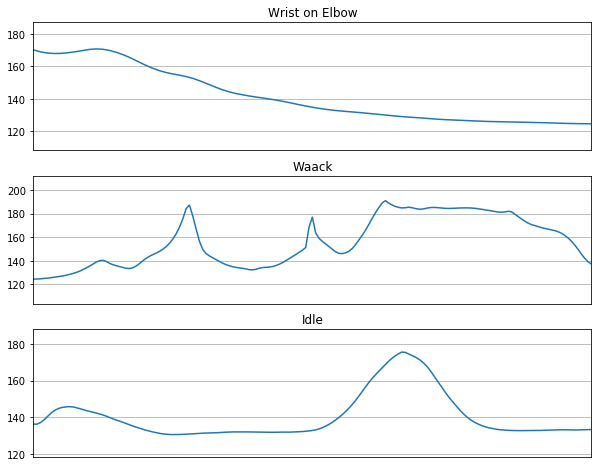

In [62]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activities, titles):
    fig, axs = plt.subplots(nrows=len(activities), figsize=(10, 8))
    for i in range(0, len(activities)):
        plot_axis(axs[i], activities[i]['PacketCounter'], activities[i]['m'], titles[i])
    plt.subplots_adjust(hspace=0.2)
    plt.show()

plot_activity([wrist_on_elbow, waack, idle],
              ['Wrist on Elbow', 'Waack', 'Idle'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train_df, label_train, test_size = 0.2, random_state = 0)

In [66]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (323, 8)
y_train shape: (323, 6)


In [67]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (81, 8)
y_test shape: (81, 6)


In [68]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = label_train['Label'].iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 300 #400 #200 #300
STEP = 150  #100 #60 #80 #40 #150

X_train, y_train = create_dataset(
    df[['Euler_X', 'Euler_Y', 'Euler_Z']], 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df[['Euler_X', 'Euler_Y', 'Euler_Z']], 
    TIME_STEPS, 
    STEP
)

In [69]:
print(X_train.shape, y_train.shape)

(254, 150, 3) (254, 1)


In [70]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [71]:
print(X_train.shape, y_train.shape)

(254, 150, 3) (254, 3)


In [72]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[0], X_train.shape[1]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [73]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64, #64 #128 #32
    validation_split=0.1,
    shuffle=True
)

Train on 228 samples, validate on 26 samples
Epoch 1/20
228/228 [==============================] - 3s 14ms/step - loss: 0.9382 - acc: 0.5439 - val_loss: 1.7853 - val_acc: 0.0000e+00
Epoch 2/20
228/228 [==============================] - 2s 8ms/step - loss: 0.3868 - acc: 0.8816 - val_loss: 1.9357 - val_acc: 0.0000e+00
Epoch 3/20
228/228 [==============================] - 2s 9ms/step - loss: 0.2503 - acc: 0.9123 - val_loss: 1.8601 - val_acc: 0.0000e+00
Epoch 4/20
228/228 [==============================] - 2s 9ms/step - loss: 0.1890 - acc: 0.9123 - val_loss: 1.6679 - val_acc: 0.0000e+00
Epoch 5/20
228/228 [==============================] - 2s 9ms/step - loss: 0.1450 - acc: 0.9430 - val_loss: 1.5174 - val_acc: 0.0000e+00
Epoch 6/20
228/228 [==============================] - 2s 9ms/step - loss: 0.1497 - acc: 0.9298 - val_loss: 1.5161 - val_acc: 0.0000e+00
Epoch 7/20
228/228 [==============================] - 2s 9ms/step - loss: 0.1147 - acc: 0.9561 - val_loss: 1.4829 - val_acc: 0.0000e+00
Ep

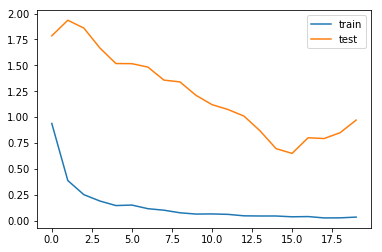

In [74]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

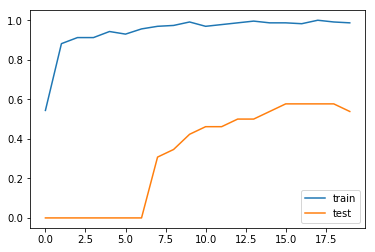

In [75]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend();

In [76]:
model.evaluate(X_test, y_test)

254/254 [==============================] - 0s 1ms/step


[0.11861118285432751, 0.9488189004537627]

In [77]:
model.evaluate(X_train, y_train)

254/254 [==============================] - 0s 1ms/step


[0.11861118285432751, 0.9488189004537627]

In [79]:
y_pred = model.predict(X_test)

In [80]:
column_names = 'Wrist_on_Elbow', 'Waack', 'Idle'

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(column_names)
  ax.set_yticklabels(column_names)
  b, t = plt.ylim() # discover the values for bottom and top
  #b += 0.5 # Add 0.5 to the bottom
  #t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

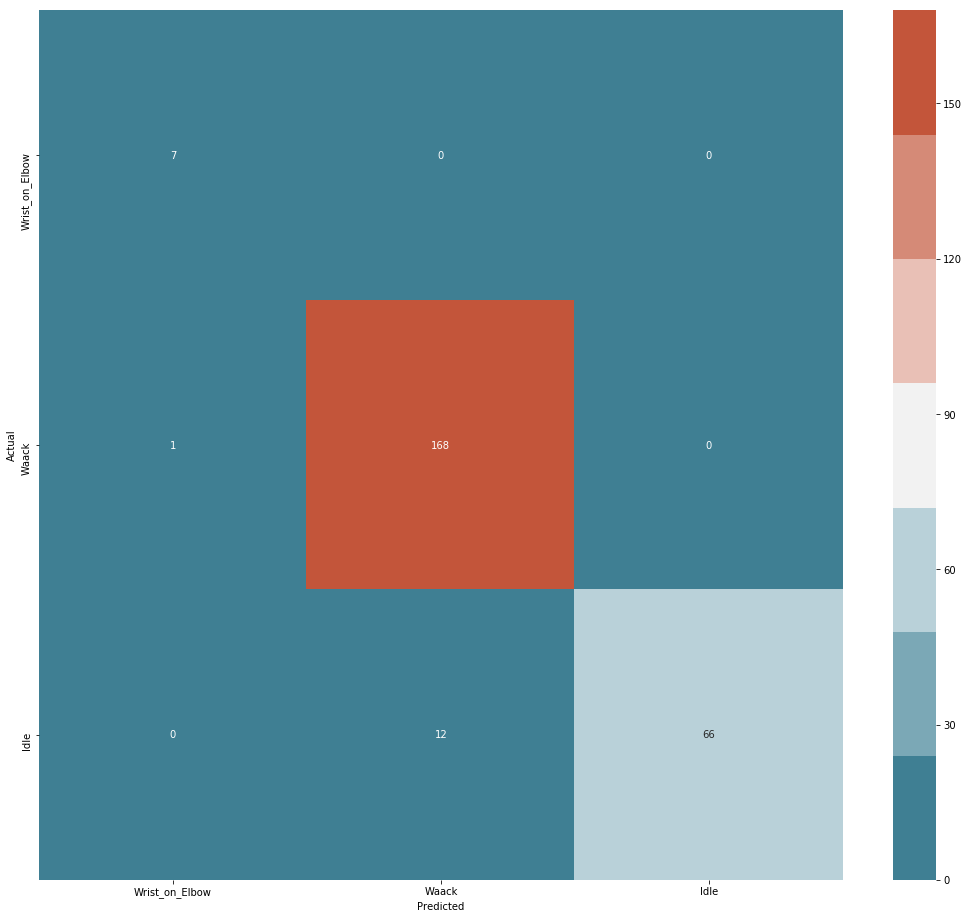

In [83]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)